In [1]:
%matplotlib inline

# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the csv files to store it into DataFrames
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [4]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
# merge data into one DataFrame
ride_per_city_data = ride_data.merge(city_data, on=["city"])
ride_per_city_data

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


In [7]:
# Total Rides
total_rides = ride_per_city_data.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [8]:
# Total Drivers
total_drivers = city_data.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [9]:
# Total Fares
total_fares = ride_per_city_data.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [10]:
# Average Fare per Ride
mean_fare_per_type = ride_per_city_data.groupby(["type"]).mean()["fare"]
mean_fare_per_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [11]:
# Average Fare per Driver
mean_fare_per_driver = total_fares / total_drivers
mean_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [12]:
# Create table with the calculated data
summary_data = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": mean_fare_per_type,
    "Average Fare per Driver": mean_fare_per_driver},
    index=['Rural', 'Suburban', 'Urban'])
summary_data["Total Rides"] = summary_data["Total Rides"].map('{:,}'.format)
summary_data["Total Drivers"] = summary_data["Total Drivers"].map('{:,}'.format)
summary_data["Total Fares"] = summary_data["Total Fares"].map('${:,.2f}'.format)
summary_data["Average Fare per Ride"] = summary_data["Average Fare per Ride"].map('${:,.2f}'.format)
summary_data["Average Fare per Driver"] = summary_data["Average Fare per Driver"].map('${:,.2f}'.format)
summary_data

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [13]:
# Rename columns
ride_per_city_data = ride_per_city_data.rename(columns={
        'city': 'City', 
        'date':'Date',
        'fare':'Fare', 
        'ride_id': 'Ride Id',
        'driver_count': 'No. Drivers', 
        'type':'City Type'
    })
ride_per_city_data.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [14]:
# Set the index to the Date column
ride_per_city_data = ride_per_city_data.set_index("Date")
ride_per_city_data.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-04-07 20:51:11,Lake Jonathanshire,31.25,4441251834598,5,Urban
2019-03-09 23:45:55,Lake Jonathanshire,19.89,2389495660448,5,Urban
2019-04-07 18:09:21,Lake Jonathanshire,24.28,7796805191168,5,Urban
2019-01-02 14:14:50,Lake Jonathanshire,13.89,424254840012,5,Urban


In [15]:
# Create a new DataFrame for fares and include only the Date, City Type, and Fare 
# columns using the copy() method on the merged DataFrame.
# deep=True

fare_data = ride_per_city_data[["City Type", "Fare"]].copy()
fare_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-05-07 19:22:15
Data columns (total 2 columns):
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [16]:
# Drop the extra Date column

In [17]:
# Set the index to the datetime data type
fare_data.index = pd.to_datetime(fare_data.index)
fare_data.index

DatetimeIndex(['2019-01-14 10:14:22', '2019-04-07 20:51:11',
               '2019-03-09 23:45:55', '2019-04-07 18:09:21',
               '2019-01-02 14:14:50', '2019-04-06 11:30:32',
               '2019-03-21 00:18:34', '2019-01-28 00:07:00',
               '2019-01-24 12:24:22', '2019-03-24 16:27:49',
               ...
               '2019-01-09 15:30:35', '2019-03-12 04:22:26',
               '2019-02-22 09:01:37', '2019-02-22 01:46:43',
               '2019-02-04 16:29:23', '2019-04-18 19:33:12',
               '2019-03-02 21:04:10', '2019-03-06 20:06:51',
               '2019-02-02 06:28:04', '2019-05-07 19:22:15'],
              dtype='datetime64[ns]', name='Date', length=2375, freq=None)

In [18]:
# Check the DataFrame using the info() method to make sure the index is a datetime data type
fare_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-05-07 19:22:15
Data columns (total 2 columns):
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [19]:
# Calculate the sum() of fares by the type of city and date using groupby() to create a new DataFrame
fares_by_type_and_date = fare_data.groupby(["City Type", "Date"]).sum()
fares_by_type_and_date

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [20]:
# Reset the index, which is needed for Step 10
fares_by_type_and_date = fares_by_type_and_date.reset_index()
fares_by_type_and_date.head()

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [21]:
# Create a pivot table DataFrame with the Date as the index and columns = 'City Type' 
# with the Fare for each Date in each row.
pivot_data_frame = pd.pivot_table(fares_by_type_and_date, values='Fare', index=['Date'],
                    columns=['City Type'])
pivot_data_frame

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [22]:
# Create a new DataFrame from the pivot table DataFrame 
# on the given dates '2019-01-01':'2019-04-28' using loc
fares_per_dates = pivot_data_frame.loc['2019-01-01':'2019-04-28']
fares_per_dates

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [23]:
# Create a new DataFrame by setting the DataFrame you created in Step 11 with resample()
# in weekly bins, and calculate the sum() of the fares for each week
fares_per_week = fares_per_dates.resample('W').sum()
fares_per_week

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


ValueError: bottom cannot be >= top

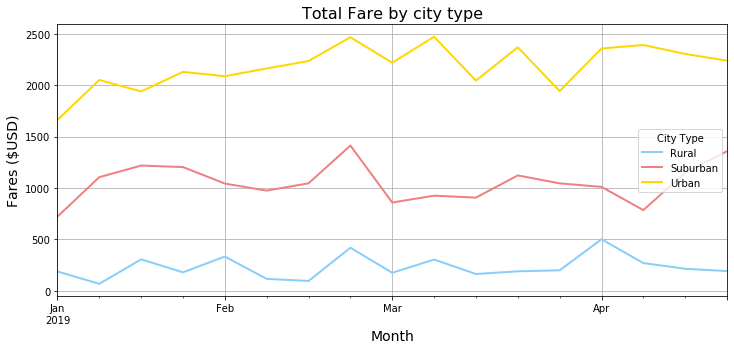

In [24]:
# Plot the data with df.plot() method
fares_per_week.plot.line(
    figsize=(12, 5), 
    linewidth=2,
    color=["lightskyblue", "lightcoral", "gold"]
)
plt.style.use('fivethirtyeight')
plt.xlabel("Month",fontsize=14)
plt.ylabel("Fares ($USD)",fontsize=14)
# plt.set_title=("Total Fare by city type",fontsize=16)
plt.title("Total Fare by city type",fontsize=16)
plt.grid()
plt.subplots_adjust(bottom="4")
# Save Figure
plt.savefig("analysis/Fig8.png")
plt.show()